In [1]:
# Import libraries and set initial configurations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Read the CSV file
df = pd.read_csv('ufc-fighters-statistics.csv')

# Win-Loss Distribution Analysis
### Calculate win percentages for each fighter and analyze the spread.



In [ ]:
fighter_win_percentage = round(df.wins/(df.wins+df.losses+df.draws)*100, 2) # Calculate winning %, round to 2 decimals, convert to str and append '%'
fighter_win_percentage_df = pd.concat([df.name, fighter_win_percentage.astype(str) + '%'], axis=1) # Concatenate names and winning % in the df
fighter_win_percentage_df.columns = ['Name', 'Winning %']

fighter_win_percentage_df.sort_values(by='Winning %', ascending=False) # Table showing winning % for each fighter, sorted by winning %%!




In [19]:
# Fighter with the most wins
#df.loc[df.wins.idxmax()]

# Fighter with the most losses
#df.loc[df.losses.idxmax()]

# Fighter with the most draws
#df.loc[df.draws.idxmax()]

win_percentage_spread = fighter_win_percentage.max() - fighter_win_percentage.min()
print('The spread for the winning percentage is', win_percentage_spread,'%')

The spread for the winning percentage is 100.0 %


### Visualizing the distribution of wins and losses among fighters.

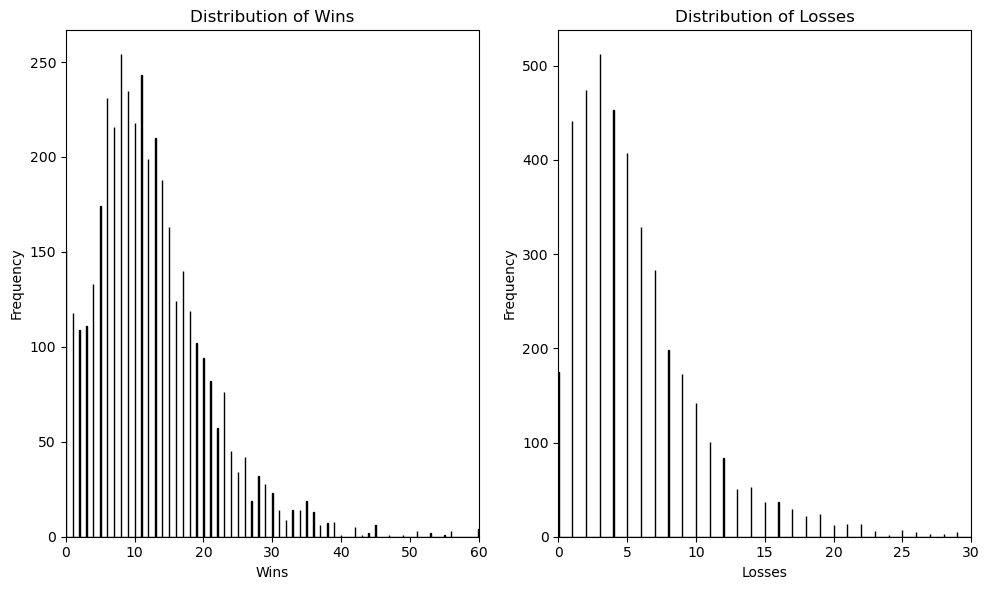

In [17]:
# Plotting histograms for wins and losses
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['wins'], bins=len(df.wins), color='blue', edgecolor='black')
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.xlim(0, 60)

plt.subplot(1, 2, 2)
plt.hist(df['losses'], bins=len(df.losses), color='red', edgecolor='black')
plt.title('Distribution of Losses')
plt.xlabel('Losses')
plt.ylabel('Frequency')
plt.xlim(0, 30)

plt.tight_layout()
plt.show()

2. **Biographical Characteristics Analysis:**
   - Explore the distribution of fighters' heights, weights, and reaches.
   - Investigate how these biographical factors correlate with performance.

3. **Temporal Analysis:**
   - Examine the distribution of fighters' dates of birth.
   - Group fighters by different time periods or age ranges and analyze their statistics.

4. **Fighting Stance Comparison:**
   - Compare win percentages among different fighting stances (Orthodox, Southpaw, Switch).

5. **Top Performers Identification:**
   - Identify fighters with the most wins or highest win percentages.
   - Find fighters with the most draws or losses.

6. **Correlation Analysis:**
   - Explore correlations between different attributes (e.g., height and reach, wins and losses).

7. **Experience and Age Analysis:**
   - Investigate the relationship between the number of fights and age.
   - Analyze whether experience (number of fights) impacts win rates.

8. **Visualization and Storytelling:**
   - Use visualizations such as histograms, box plots, scatter plots, and heatmaps to tell a story about the data.
   - Create comparative visualizations to highlight differences among fighters.

9. **Outlier Detection:**
   - Identify outliers in different statistics (e.g., extremely tall or short fighters, unusual win-loss ratios).

10. **Fighter Performance Over Time:**
    - Analyze changes in performance over time for individual fighters.
    - Investigate trends in win rates or other statistics across different years or periods.

11. **Regional Analysis:**
    - Analyze statistics based on fighters' regions or countries.
    - Investigate whether certain regions produce more successful fighters.

12. **Fight Outcome Analysis:**
    - Analyze how certain attributes (height, weight, reach, stance) might influence fight outcomes (wins,1. **Win-Loss Distribution Analysis:**
   - Visualize the distribution of wins, losses, and draws among fighters.
   - Calculate win percentages for each fighter and analyze the spread.